In [606]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [607]:
dataset = pd.read_csv('data/dataset/final.csv')

In [608]:
dataset['date'] = pd.to_datetime(dataset['date'])

In [609]:
dataset.set_index('date', inplace=True)

In [610]:
dataset.drop(['realized_variance'], axis=1, inplace=True)

In [611]:
dataset.head()
dataset.dropna(inplace=True)

In [612]:
dataset['y_mu'] = (dataset.shift(-14)['usd/cad'] / dataset['usd/cad'] - 1)
dataset['y_jump'] = dataset.shift(-14)['jump']
dataset['y_bipower_variance'] = dataset.shift(-14)['bipower_variance']

In [613]:
dataset.dropna(inplace=True)

y_mu = dataset['y_mu']
y_jump = dataset['y_jump']
y_bipower_variance = dataset['y_bipower_variance']
dataset = dataset.drop(['y_mu', 'y_jump', 'y_bipower_variance'], axis=1)

In [614]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
predictedVariable = y_mu

X_train, X_test, y_train, y_test = train_test_split(dataset, predictedVariable, test_size=0.4, shuffle=False)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.2, shuffle=False)

# scaler = StandardScaler()
# scaler.fit(pd.DataFrame(y_train))
#
# y_train = scaler.transform(pd.DataFrame(y_train))
# y_test = scaler.transform(pd.DataFrame(y_test))
# y_val = scaler.transform(pd.DataFrame(y_val))


In [615]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

pipe = Pipeline([('scaler', StandardScaler()), ('ls', linear_model.Lasso(alpha=0.001))])
pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_train_res = pd.DataFrame(y_train).to_numpy() - pd.DataFrame(y_train_pred).to_numpy()
y_train_res = pd.DataFrame(y_train_res)

<AxesSubplot: >

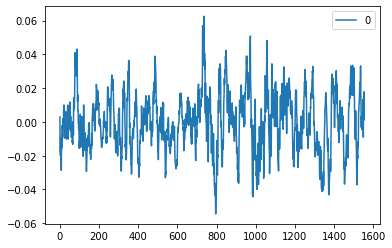

In [616]:
y_train_res.plot()

In [617]:


for i in range(len(X_train.columns)):
    print(X_train.columns[i], pipe['ls'].coef_[i])

usd/cad -0.0
DGS2 0.0
DGS3 0.0
DGS5 0.0
DGS10 0.0
cad_2y 0.00021217490229831176
cad_3y 0.0
cad_5y 0.0
cad_10y 0.0
us_2y -0.0
us_3y -0.0
us_5y -0.0
us_10y -0.0
convex1 0.0
convex2 0.0
convex3 -0.0
W.BCPI -0.0
W.BCNE 0.0
W.ENER -0.0
W.MTLS 0.0
W.FOPR 0.0
W.AGRI -0.0
W.FISH -0.0
can_rate 0.0
usd 0.0
jpy 0.00421657950497499
czk 0.0
dkk -0.0005976452562785193
gbp -0.0009451606116670277
huf 0.0
pln 0.0
sek 0.0
chf -0.0
nok 0.0
aud 0.0
cad -0.0028123844215174583
hkd 0.0
krw -0.0
nzd 0.0
sgd -0.0
zar -0.0
us_rate -0.0
can_sentiment -0.0
log usd/cad -0.0
jump -0.0027462644706696213
bipower_variance -6.276035910167902e-05


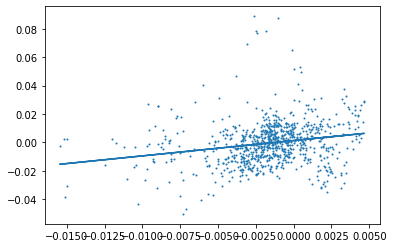

In [618]:
import matplotlib.pyplot as plt
# Compute model performance on validation set
y_test_pred = pipe.predict(X_test)
# pipe['ls'].coef_


#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(y_test_pred, y_test , 1)
# m, b = np.polyfit(y_test_pred, y_test , 1)
#add linear regression line to scatterplot


plt.scatter(y_test_pred, y_test, s=1)
plt.plot(y_test_pred, m*y_test_pred+b)
plt.show()

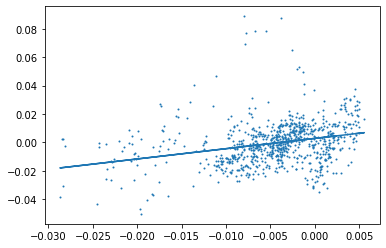

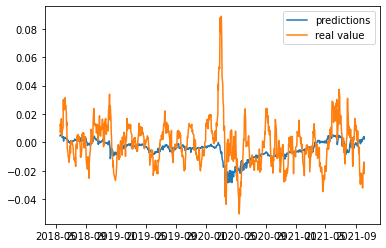

In [619]:
pipe_forest = Pipeline([('rf', RandomForestRegressor(n_estimators=500, max_features=2, max_depth=3))])
pipe_forest.fit(X_train, np.ravel(y_train_res))

y_test_res_pred = pipe_forest.predict(X_test)
y_test_pred2 = y_test_pred
y_test_pred = y_test_res_pred + y_test_pred2
# pipe['ls'].coef_


#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(y_test_pred, y_test , 1)
# m, b = np.polyfit(y_test_pred, y_test , 1)
#add linear regression line to scatterplot


plt.scatter(y_test_pred, y_test, s=1)
plt.plot(y_test_pred, m*y_test_pred+b)
plt.show()

plt.plot(X_test.index, y_test_pred, label='predictions')
plt.plot(X_test.index, y_test, label='real value')
plt.legend()
plt.show()

In [620]:
pipe_forest['rf'].feature_importances_

array([0.0331208 , 0.01730281, 0.01247892, 0.01604302, 0.01689197,
       0.01813546, 0.01951767, 0.01703268, 0.01463474, 0.0230675 ,
       0.03005579, 0.02389318, 0.01488189, 0.00921867, 0.01937723,
       0.02088103, 0.04381223, 0.02742084, 0.0370267 , 0.0220646 ,
       0.02236068, 0.01937004, 0.01874628, 0.00463796, 0.01317579,
       0.03493796, 0.02517137, 0.0408917 , 0.0274833 , 0.02357622,
       0.02165523, 0.01840677, 0.01853312, 0.03480198, 0.01539197,
       0.03846804, 0.01402815, 0.0319036 , 0.03658601, 0.03467183,
       0.02853146, 0.00601893, 0.0007968 , 0.00400211, 0.01846105,
       0.01053395])

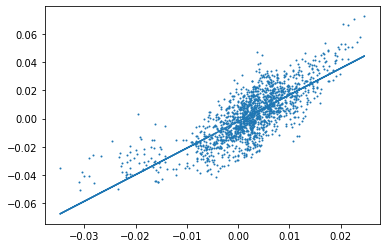

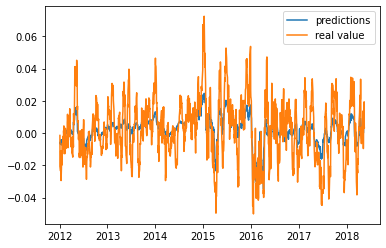

In [621]:
y_train_res_pred = pipe_forest.predict(X_train)
y_train_pred2 = y_train_pred
y_train_pred = y_train_res_pred + y_train_pred2
# pipe['ls'].coef_


#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(y_train_pred, y_train , 1)
# m, b = np.polyfit(y_test_pred, y_test , 1)
#add linear regression line to scatterplot


plt.scatter(y_train_pred, y_train, s=1)
plt.plot(y_train_pred, m*y_train_pred+b)
plt.show()

plt.plot(X_train.index, y_train_pred, label='predictions')
plt.plot(X_train.index, y_train, label='real value')
plt.legend()
plt.show()